# importar recursos

In [51]:
import requests
from bs4 import BeautifulSoup
import csv
import os
import re
import csv
import spacy
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

!pip install -U spacy
!python -m spacy download es_core_news_sm
!python -m spacy download es_core_news_lg


# Definir la ruta del archivo en el escritorio
archivo_csv = os.path.join(os.path.expanduser("~"), "Escritorio", "datos_extraidos.csv")

     ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
     --------------------------------------- 0.0/12.9 MB 330.3 kB/s eta 0:00:39
     --------------------------------------- 0.0/12.9 MB 330.3 kB/s eta 0:00:39
     --------------------------------------- 0.1/12.9 MB 328.2 kB/s eta 0:00:40
     --------------------------------------- 0.1/12.9 MB 504.4 kB/s eta 0:00:26
     --------------------------------------- 0.1/12.9 MB 516.7 kB/s eta 0:00:25
      -------------------------------------- 0.2/12.9 MB 551.6 kB/s eta 0:00:24
      -------------------------------------- 0.2/12.9 MB 590.8 kB/s eta 0:00:22
      -------------------------------------- 0.2/12.9 MB 518.8 kB/s eta 0:00:25
      -------------------------------------- 0.2/12.9 MB 518.8 kB/s eta 0:00:25
      -------------------------------------- 0.2/12.9 MB 518.8 kB/s eta 0:00:25
     - ------------------------------------- 0.4/12.9 MB

# Bases de datos periodico el espectador

In [52]:
# Lista de URLs de la base de datos El espectador 
BASE_DATOS_espectador= [
"https://www.elespectador.com/opinion/columnistas/gloria-arias-nieto/la-terquedad-de-la-guerra/",
"https://www.elespectador.com/opinion/editorial/la-corte-constitucional-apoya-la-paz-total-con-estructura/",
"https://www.elespectador.com/opinion/columnistas/cristina-de-la-torre/predial-tierra-y-paz/",
"https://www.elespectador.com/opinion/columnistas/daniel-garcia-pena/repensando-la-paz-total/",
"https://www.elespectador.com/opinion/editorial/una-oportunidad-para-corregir-el-rumbo-de-la-paz/",
"https://www.elespectador.com/opinion/columnistas/cristina-de-la-torre/eln-quiere-la-paz-o-su-dictadura-armada/",
"https://www.elespectador.com/opinion/columnistas/gloria-arias-nieto/la-paz-como-cultura/",
"https://www.elespectador.com/opinion/columnistas/yesid-reyes-alvarado/cambie-de-opinion-sobre-la-ley-de-paz-total/",
"https://www.elespectador.com/opinion/columnistas/maria-alejandra-villamizar/obstruir-la-paz/",
"https://www.elespectador.com/opinion/columnistas/maria-teresa-ronderos/otra-negociacion-de-paz-sobre-terreno-quebrado/",
"https://www.elespectador.com/opinion/columnistas/cristina-de-la-torre/paz-volver-a-barajar/",
"https://www.elespectador.com/opinion/editorial/el-acuerdo-de-paz-no-entrego-al-pais/",
"https://www.elespectador.com/opinion/columnistas/felipe-zuleta-lleras/cual-paz-total/",
"https://www.elespectador.com/opinion/columnistas/mario-morales/nueve-procesos-de-paz-y-una-guerra-sin-cuartel/",
"https://www.elespectador.com/opinion/editorial/que-el-cese-al-fuego-perdure-y-lleve-a-un-acuerdo-de-paz/",
"https://www.elespectador.com/opinion/columnistas/gloria-arias-nieto/la-paz-en-construccion/",
"https://www.elespectador.com/opinion/editorial/la-esperanza-de-paz-no-admite-tantas-ambivalencias/",
"https://www.elespectador.com/opinion/columnistas/gloria-arias-nieto/notas-de-paz/",
"https://www.elespectador.com/opinion/columnistas/alejandro-alvarez/gobernabilidad-y-paz/",
"https://www.elespectador.com/opinion/columnistas/aldo-civico/el-desafio-de-la-paz/",
"https://www.elespectador.com/opinion/columnistas/pedro-viveros/paz-total-en-la-casa-de-narino/",
"https://www.elespectador.com/opinion/columnistas/cristina-nicholls/a-donde-se-fue-el-entusiasmo-por-la-paz/",
"https://www.elespectador.com/opinion/columnistas/oscar-sevillano/me-gusta-la-paz-total-pero/",
"https://www.elespectador.com/opinion/columnistas/juan-manuel-ospina/la-paz-total-simplemente-una-bella-aspiracion/",
"https://www.elespectador.com/opinion/columnistas/yolanda-ruiz/la-paz-entre-los-pacificadores/",
"https://www.elespectador.com/opinion/columnistas/gustavo-gallon/para-lograr-una-cultura-para-vivir-en-paz/",
"https://www.elespectador.com/opinion/columnistas/mario-morales/si-quieren-paz/",
"https://www.elespectador.com/opinion/columnistas/william-ospina/la-otra-paz/",
"https://www.elespectador.com/opinion/columnistas/juan-david-ochoa/paz-sobre-el-pantano/",
"https://www.elespectador.com/opinion/columnistas/alejandro-reyes-posada/las-cuatro-dimensiones-de-la-paz-total/",
"https://www.elespectador.com/opinion/columnistas/hernando-roa-suarez/la-paz-si-avancemos/"
]
# Crear una lista para almacenar los datos extraídos
datos_extraidos = []

# Iterar sobre cada URL de la base de datos
for URL_BASE in BASE_DATOS_espectador:
    pedido_obtenido = requests.get(URL_BASE)
    html_obtenido = pedido_obtenido.text
    soup = BeautifulSoup(html_obtenido, "html.parser")

    # Encontrar los elementos <div> con la clase "font--secondary"
    divs = soup.find_all(class_="font--secondary")

    # Crear una lista para almacenar los textos del artículo
    texto_articulo = []
    for div in divs:
        texto_articulo.append(div.text.strip())

    # Unir todos los textos del artículo en una cadena
    articulo_completo = " ".join(texto_articulo)

    # Agregar solo el texto del artículo a la lista de datos_extraidos
    datos_extraidos.append(articulo_completo)

# Escribir los datos extraídos en un archivo CSV
with open('datos_extraidoselespectador.csv', 'w', newline='', encoding='utf-8-sig') as archivo:
    escritor_csv = csv.writer(archivo)
    for texto_articulo in datos_extraidos:
        escritor_csv.writerow([texto_articulo])

# preprocesamiento 

In [53]:
# Definir la función para eliminar caracteres no deseados
def eliminar_caracteres(texto):
    # Definir una expresión regular para encontrar caracteres no alfabéticos o espacios
    patron = r'[^a-zA-ZáéíóúüñÁÉÍÓÚÜÑ\s]'
    # Reemplazar los caracteres no deseados por espacios en blanco
    texto_limpio = re.sub(patron, ' ', str(texto))
    return texto_limpio
#------

import spacy
from spacy.lang.es.stop_words import STOP_WORDS

# Descargar y cargar el modelo de spaCy para español
spacy.cli.download("es_core_news_sm")
nlp = spacy.load("es_core_news_sm")

# Obtener la lista de stopwords en español de spaCy
stopwords_espanol = STOP_WORDS

# Definir una función para eliminar stopwords utilizando spaCy
def eliminar_stopwords(texto):
    # Procesar el texto con spaCy
    doc = nlp(texto)
    # Filtrar las palabras que no son stopwords
    palabras_filtradas = [token.text for token in doc if token.text.lower() not in stopwords_espanol]
    # Unir las palabras filtradas en un texto nuevamente
    texto_filtrado = ' '.join(palabras_filtradas)
    return texto_filtrado

# Definir una función para tokenizar el texto utilizando spaCy
def tokenizar_texto(texto):
    # Procesar el texto con spaCy
    doc = nlp(texto)
    # Extraer los tokens
    tokens = [token.text for token in doc]
    return tokens


# Definir una función para lematizar el texto
def lematizar_texto(tokens):
    # Unir los tokens en una cadena de texto
    texto = ' '.join(tokens)
    # Procesar el texto con el modelo de lenguaje en español
    doc = nlp(texto)
    # Extraer las formas base (lemas) de cada palabra
    lemas = [token.lemma_ for token in doc]
    return lemas
#------

def eliminar_verbos(texto):
    # Procesar el texto con spaCy
    doc = nlp(texto)
    # Filtrar las palabras que no son verbos
    palabras_filtradas = [token.text for token in doc if token.pos_ != 'VERB']
    # Unir las palabras filtradas en un texto nuevamente
    texto_filtrado = ' '.join(palabras_filtradas)
    return texto_filtrado


✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [54]:
# Leer el archivo CSV con los datos extraídos
with open('datos_extraidoselespectador.csv', 'r', encoding='utf-8-sig') as archivo:
    lector_csv = csv.reader(archivo)
    # Extraer los datos de la primera columna en una lista
    datos_extraidos_total = [fila[0] for fila in lector_csv]
    
# Aplicar la función eliminar_caracteres a cada texto en la lista datos_extraidos_total
contenido_limpiado = [eliminar_caracteres(texto) for texto in datos_extraidos_total]

# Convertir el texto limpiado a minúsculas
contenido_limpiado_minusculas = [texto.lower() for texto in contenido_limpiado]

# Aplicar la función eliminar_verbos a cada texto en la lista
contenido_sin_verbos = [eliminar_verbos(texto) for texto in contenido_limpiado_minusculas]

# Aplicar la función eliminar_stopword a cada texto en la lista
contenido_sin_stopword = [eliminar_stopwords(texto) for texto in contenido_sin_verbos]

# Aplicar la función de tokenización a cada texto en la lista
contenido_tokens= [tokenizar_texto(texto) for texto in contenido_sin_stopword]

# Aplicar la función de lematización a cada lista de tokens en la lista de contenidos
contenido_lemas= [lematizar_texto(tokens) for tokens in contenido_tokens]

# Eliminar espacios en blanco y caracteres de nueva línea
contenido_lemas= [[palabra.strip() for palabra in sublista if palabra.strip()] for sublista in contenido_lemas]

# Escribir los datos en un nuevo archivo CSV
with open('lemas_elespectador.csv', 'w', newline='', encoding='utf-8-sig') as archivo:
    escritor_csv = csv.writer(archivo)
    for lemas in contenido_lemas:
        escritor_csv.writerow(lemas)

# Palabras claves 

In [55]:
# Crear un contador para almacenar la frecuencia de las palabras
contador_palabras = Counter()

# Abrir el archivo CSV y contar la frecuencia de las palabras
with open('lemas_elespectador.csv', 'r', newline='', encoding='utf-8-sig') as archivo:
    lector_csv = csv.reader(archivo)
    for fila in lector_csv:
        # Filtrar palabras que no sean solo espacios en blanco
        palabras_filtradas = [palabra.strip() for palabra in fila if palabra.strip()]
        contador_palabras.update(palabras_filtradas)

# Ordenar las palabras por frecuencia de mayor a menor
palabras_ordenadas = contador_palabras.most_common()

# Imprimir la tabla de frecuencia de las palabras ordenadas
print("Tabla de frecuencia de las palabras periodico La Republica:")
print("{:<15} {:<10}".format("Palabra", "Frecuencia"))
for palabra, frecuencia in palabras_ordenadas:
    print("{:<15} {:<10}".format(palabra, frecuencia))

Tabla de frecuencia de las palabras periodico La Republica:
Palabra         Frecuencia
paz             191       
gobierno        55        
político        48        
país            46        
negociación     43        
armado          40        
grupo           40        
proceso         40        
violencia       39        
diálogo         28        
petro           28        
presidente      28        
público         28        
población       27        
farc            27        
colombiano      25        
criminal        24        
año             23        
arma            22        
alto            22        
eln             22        
cesar           22        
fuego           21        
emc             21        
nacional        20        
colombia        20        
sociedad        19        
social          19        
mano            17        
ley             17        
comisionado     17        
sometimiento    17        
territorio      16        
secuestro       15    

## SPACY

In [56]:
# Carga el modelo de lenguaje grande de spaCy en español
nlp = spacy.load('es_core_news_lg')

# Define la palabra objetivo
palabra_objetivo = 'paz'

# Aplanar el corpus a una sola lista de palabras y eliminar duplicados
palabras_corpus = list(set([palabra for sublist in contenido_lemas for palabra in sublist]))

# Procesar la palabra objetivo con el modelo spaCy
doc_objetivo = nlp(palabra_objetivo)

# Encuentra palabras similares a la palabra objetivo en el corpus definido
palabras_similares = []

# Calcular la similitud entre la palabra objetivo y cada palabra del corpus
for palabra in palabras_corpus:
    doc_p = nlp(palabra)
    similitud = doc_objetivo.similarity(doc_p)
    palabras_similares.append((palabra, similitud))

# Ordenar las palabras por similitud en orden descendente
palabras_similares = sorted(palabras_similares, key=lambda item: -item[1])

# Preparar los datos para escribir en el archivo CSV
contenido_lemas_csv = [['Palabra', 'Similitud']]  # Encabezados del CSV
for palabra, similitud in palabras_similares:  
    contenido_lemas_csv.append([palabra, f"{similitud:.4f}"])

# Escribir los datos en un nuevo archivo CSV
with open('similitud_paz_el_espectador.csv', 'w', newline='', encoding='utf-8-sig') as archivo:
    escritor_csv = csv.writer(archivo)
    escritor_csv.writerows(contenido_lemas_csv)

# Leer y mostrar el contenido del archivo CSV
with open('similitud_paz_el_espectador.csv', 'r', newline='', encoding='utf-8-sig') as archivo:
    lector_csv = csv.reader(archivo)
    for fila in lector_csv:
        print(fila)

C:\Users\USER\AppData\Local\Temp\ipykernel_34036\328950464.py:19: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  similitud = doc_objetivo.similarity(doc_p)


['Palabra', 'Similitud']
['paz', '1.0000']
['reconciliación', '0.5732']
['esperanza', '0.5374']
['pacífico', '0.5349']
['serenidad', '0.5212']
['democracia', '0.5209']
['libertad', '0.5198']
['felicidad', '0.5169']
['tregua', '0.5152']
['justicia', '0.5142']
['tranquilidad', '0.5116']
['solidaridad', '0.5001']
['desarme', '0.4654']
['impunidad', '0.4524']
['voluntad', '0.4509']
['pacto', '0.4465']
['democrático', '0.4452']
['gobernabilidad', '0.4436']
['convivencia', '0.4405']
['independencia', '0.4391']
['diálogo', '0.4317']
['humanitario', '0.4314']
['bienestar', '0.4274']
['fortaleza', '0.4229']
['confianza', '0.4206']
['alianza', '0.4144']
['pacifista', '0.4118']
['guerra', '0.4110']
['injusticia', '0.4088']
['liberación', '0.4087']
['promesa', '0.4079']
['democráticamente', '0.4069']
['gloria', '0.4068']
['cohesión', '0.4059']
['equidad', '0.4033']
['perdón', '0.4025']
['eterno', '0.4011']
['espíritu', '0.4009']
['lucha', '0.4002']
['fe', '0.3996']
['liberalidad', '0.3992']
['pueb

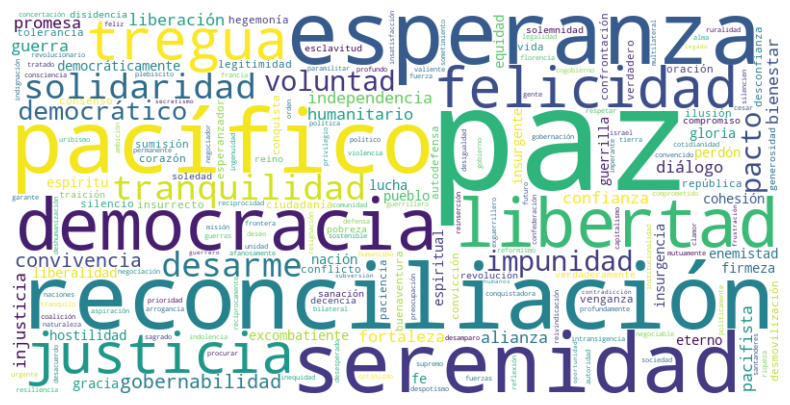

In [60]:
# Generar una nube de palabras
word_freq = {palabra: float(similitud) for palabra, similitud in palabras_similares}

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [61]:
# Define la palabra objetivo
palabra_objetivo = 'guerra'

# Aplanar el corpus a una sola lista de palabras y eliminar duplicados
palabras_corpus = list(set([palabra for sublist in contenido_lemas for palabra in sublist]))

# Procesar la palabra objetivo con el modelo spaCy
doc_objetivo = nlp(palabra_objetivo)

# Encuentra palabras similares a la palabra objetivo en el corpus definido
palabras_similares = []

# Calcular la similitud entre la palabra objetivo y cada palabra del corpus
for palabra in palabras_corpus:
    doc_p = nlp(palabra)
    similitud = doc_objetivo.similarity(doc_p)
    palabras_similares.append((palabra, similitud))

# Ordenar las palabras por similitud en orden descendente
palabras_similares = sorted(palabras_similares, key=lambda item: -item[1])

# Preparar los datos para escribir en el archivo CSV
contenido_lemas_csv = [['Palabra', 'Similitud']]  # Encabezados del CSV
for palabra, similitud in palabras_similares:  
    contenido_lemas_csv.append([palabra, f"{similitud:.4f}"])

# Escribir los datos en un nuevo archivo CSV
with open('similitud_guerra_el_espectador.csv', 'w', newline='', encoding='utf-8-sig') as archivo:
    escritor_csv = csv.writer(archivo)
    escritor_csv.writerows(contenido_lemas_csv)

# Leer y mostrar el contenido del archivo CSV
with open('similitud_guerra_el_espectador.csv', 'r', newline='', encoding='utf-8-sig') as archivo:
    lector_csv = csv.reader(archivo)
    for fila in lector_csv:
        print(fila)

C:\Users\USER\AppData\Local\Temp\ipykernel_34036\719930728.py:16: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  similitud = doc_objetivo.similarity(doc_p)


['Palabra', 'Similitud']
['guerra', '1.0000']
['guerras', '0.7669']
['guerrilla', '0.6411']
['revolución', '0.6406']
['insurgencia', '0.6352']
['conflicto', '0.6187']
['lucha', '0.6163']
['conquista', '0.6158']
['militar', '0.5857']
['traición', '0.5840']
['insurgente', '0.5835']
['excombatiente', '0.5763']
['enfrentamiento', '0.5725']
['confrontación', '0.5670']
['destrucción', '0.5607']
['hostilidad', '0.5599']
['ejército', '0.5574']
['esclavitud', '0.5527']
['insurrecto', '0.5498']
['milicia', '0.5459']
['independencia', '0.5453']
['batallar', '0.5434']
['exterminio', '0.5358']
['enemistad', '0.5345']
['nación', '0.5343']
['guerrillero', '0.5326']
['subversión', '0.5323']
['crisis', '0.5313']
['liberación', '0.5298']
['alzamiento', '0.5264']
['bando', '0.5184']
['francia', '0.5104']
['terrorista', '0.5070']
['república', '0.5020']
['intransigencia', '0.5005']
['disidencia', '0.4999']
['autodefensa', '0.4993']
['violencia', '0.4987']
['desmovilización', '0.4985']
['conquistadora', '0

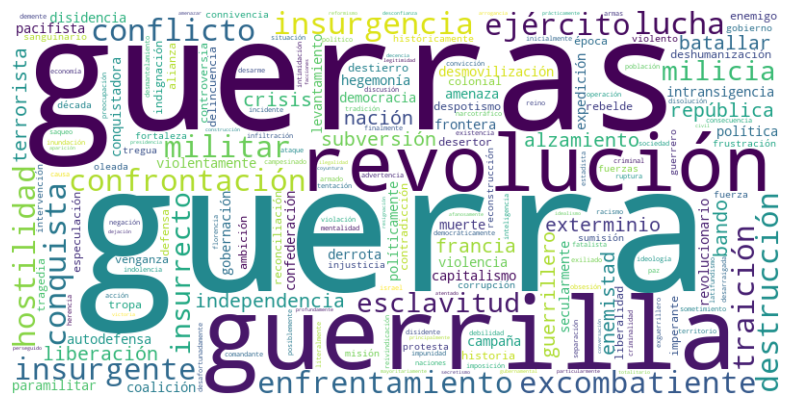

In [62]:
# Generar una nube de palabras
word_freq = {palabra: float(similitud) for palabra, similitud in palabras_similares}

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Word2vec

In [63]:
import gensim.downloader as api
import csv

# Descargar el modelo pre-entrenado de Word2Vec en español
modelo_word2vec = api.load('word2vec-google-news-300')

# Define la palabra objetivo
palabra_objetivo = 'paz'

# Aplanar el corpus a una sola lista de palabras y eliminar duplicados
palabras_corpus = list(set([palabra for sublist in contenido_lemas for palabra in sublist]))

# Encontrar palabras similares a la palabra objetivo en el corpus definido
palabras_similares = []

for palabra in palabras_corpus:
    if palabra in modelo_word2vec:
        similitud = modelo_word2vec.similarity(palabra_objetivo, palabra)
        palabras_similares.append((palabra, similitud))

# Ordenar las palabras por similitud en orden descendente
palabras_similares = sorted(palabras_similares, key=lambda item: -item[1])

# Preparar los datos para escribir en el archivo CSV
contenido_lemas_csv = [['Palabra', 'Similitud']]  # Encabezados del CSV
for palabra, similitud in palabras_similares:  
    contenido_lemas_csv.append([palabra, f"{similitud:.4f}"])

# Escribir los datos en un nuevo archivo CSV
with open('word2vec_paz_el_espectador.csv', 'w', newline='', encoding='utf-8-sig') as archivo:
    escritor_csv = csv.writer(archivo)
    escritor_csv.writerows(contenido_lemas_csv)

# Leer y mostrar el contenido del archivo CSV
with open('word2vec_paz_el_espectador.csv', 'r', newline='', encoding='utf-8-sig') as archivo:
    lector_csv = csv.reader(archivo)
    for fila in lector_csv:
        print(fila)


['Palabra', 'Similitud']
['paz', '1.0000']
['estar', '0.7547']
['mundo', '0.7254']
['falta', '0.7242']
['difícil', '0.7114']
['semana', '0.7101']
['noticia', '0.7078']
['guerra', '0.7072']
['destino', '0.7067']
['feliz', '0.7066']
['país', '0.7032']
['poder', '0.7029']
['trabajo', '0.7024']
['libertad', '0.7017']
['enorme', '0.6942']
['oportunidad', '0.6942']
['tiempo', '0.6925']
['muerto', '0.6922']
['suerte', '0.6911']
['entrevista', '0.6907']
['mejor', '0.6906']
['palabra', '0.6888']
['hija', '0.6867']
['voz', '0.6865']
['hecho', '0.6860']
['trabajar', '0.6848']
['evento', '0.6819']
['único', '0.6813']
['puerta', '0.6806']
['año', '0.6802']
['niño', '0.6778']
['hijo', '0.6774']
['duro', '0.6771']
['espacio', '0.6760']
['niña', '0.6758']
['hermano', '0.6758']
['igual', '0.6748']
['gente', '0.6736']
['argentino', '0.6734']
['odio', '0.6709']
['duda', '0.6698']
['muerte', '0.6691']
['escuela', '0.6689']
['nacional', '0.6678']
['excelente', '0.6618']
['haber', '0.6618']
['fácil', '0.661

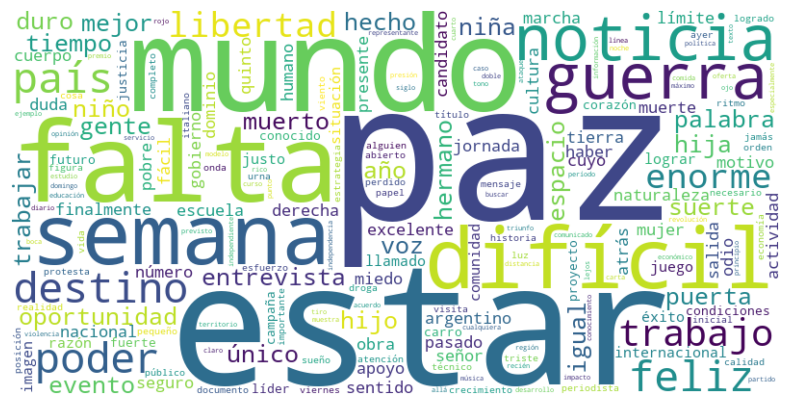

In [64]:
# Generar una nube de palabras
word_freq = {palabra: float(similitud) for palabra, similitud in palabras_similares}

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [65]:
# Define la palabra objetivo
palabra_objetivo = 'guerra'

# Aplanar el corpus a una sola lista de palabras y eliminar duplicados
palabras_corpus = list(set([palabra for sublist in contenido_lemas for palabra in sublist]))

# Encontrar palabras similares a la palabra objetivo en el corpus definido
palabras_similares = []

for palabra in palabras_corpus:
    if palabra in modelo_word2vec:
        similitud = modelo_word2vec.similarity(palabra_objetivo, palabra)
        palabras_similares.append((palabra, similitud))

# Ordenar las palabras por similitud en orden descendente
palabras_similares = sorted(palabras_similares, key=lambda item: -item[1])

# Preparar los datos para escribir en el archivo CSV
contenido_lemas_csv = [['Palabra', 'Similitud']]  # Encabezados del CSV
for palabra, similitud in palabras_similares:  
    contenido_lemas_csv.append([palabra, f"{similitud:.4f}"])

# Escribir los datos en un nuevo archivo CSV
with open('word2vec_guerra_el_espectador.csv', 'w', newline='', encoding='utf-8-sig') as archivo:
    escritor_csv = csv.writer(archivo)
    escritor_csv.writerows(contenido_lemas_csv)

# Leer y mostrar el contenido del archivo CSV
with open('word2vec_guerra_el_espectador.csv', 'r', newline='', encoding='utf-8-sig') as archivo:
    lector_csv = csv.reader(archivo)
    for fila in lector_csv:
       print(fila)

['Palabra', 'Similitud']
['guerra', '1.0000']
['odio', '0.7495']
['sentido', '0.7464']
['noticia', '0.7442']
['hecho', '0.7433']
['único', '0.7404']
['palabra', '0.7397']
['gobierno', '0.7322']
['difícil', '0.7322']
['estar', '0.7318']
['protesta', '0.7316']
['razón', '0.7290']
['actividad', '0.7290']
['trabajo', '0.7281']
['militar', '0.7277']
['país', '0.7272']
['político', '0.7262']
['campaña', '0.7257']
['falta', '0.7250']
['trabajar', '0.7234']
['muerte', '0.7216']
['atrás', '0.7210']
['proyecto', '0.7205']
['oportunidad', '0.7191']
['periodista', '0.7189']
['ejemplo', '0.7166']
['importancia', '0.7164']
['muerto', '0.7151']
['máximo', '0.7137']
['crecimiento', '0.7136']
['nacional', '0.7125']
['situación', '0.7124']
['argentino', '0.7121']
['poder', '0.7116']
['espacio', '0.7107']
['candidato', '0.7104']
['pobre', '0.7102']
['amenaza', '0.7085']
['enorme', '0.7080']
['educación', '0.7076']
['condiciones', '0.7074']
['apoyo', '0.7074']
['paz', '0.7072']
['especialmente', '0.7064']

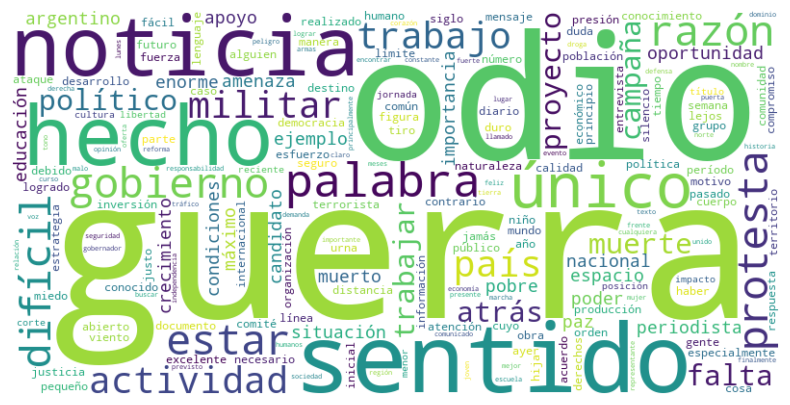

In [66]:
# Generar una nube de palabras
word_freq = {palabra: float(similitud) for palabra, similitud in palabras_similares}

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Analisis de sentimiento

In [67]:
%pip install torch
%pip install torchvision
%pip install transformers

Note: you may need to restart the kernel to use updated packages.
  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/d3/1d/a257913c89572de61316461db91867f87519146e58132cdeace3d9ffbe1f/torch-2.3.1-cp311-cp311-win_amd64.whl.metadata
  Using cached torch-2.3.1-cp311-cp311-win_amd64.whl.metadata (26 kB)
  Obtaining dependency information for typing-extensions>=4.8.0 from https://files.pythonhosted.org/packages/26/9f/ad63fc0248c5379346306f8668cda6e2e2e9c95e01216d2b8ffd9ff037d0/typing_extensions-4.12.2-py3-none-any.whl.metadata
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Obtaining dependency information for mkl<=2021.4.0,>=2021.1.1 from https://files.pythonhosted.org/packages/fe/1c/5f6dbf18e8b73e0a5472466f0ea8d48ce9efae39bd2ff38cebf8dce61259/mkl-2021.4.0-py2.py3-none-win_amd64.whl.metadata
  Using cached mkl-2021.4.0-py2.py3-none-win_amd64.whl.metadata (1.4 kB)
  Obtaining dependency information for intel-openmp==2021.* 

ERROR: Cannot uninstall 'TBB'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/e4/c3/a21a75dd2de8114a6876f16a36b033e3e62f8ade68085a711b24f4b57c17/torchvision-0.18.1-cp311-cp311-win_amd64.whl.metadata
  Using cached torchvision-0.18.1-cp311-cp311-win_amd64.whl.metadata (6.6 kB)
  Obtaining dependency information for torch==2.3.1 from https://files.pythonhosted.org/packages/d3/1d/a257913c89572de61316461db91867f87519146e58132cdeace3d9ffbe1f/torch-2.3.1-cp311-cp311-win_amd64.whl.metadata
  Using cached torch-2.3.1-cp311-cp311-win_amd64.whl.metadata (26 kB)
  Obtaining dependency information for typing-extensions>=4.8.0 from https://files.pythonhosted.org/packages/26/9f/ad63fc0248c5379346306f8668cda6e2e2e9c95e01216d2b8ffd9ff037d0/typing_extensions-4.12.2-py3-none-any.whl.metadata
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Obtaining dependency information for mkl<=2021.4.0,>=2021.1.1 from https://files.pythonhosted.org/packages/fe/1c/5f6dbf1

ERROR: Cannot uninstall 'TBB'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


Note: you may need to restart the kernel to use updated packages.


In [68]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

modelo_bert = BertForSequenceClassification.from_pretrained('dccuchile/bert-base-spanish-wwm-cased', num_labels=3)
tokenizer = BertTokenizer.from_pretrained('dccuchile/bert-base-spanish-wwm-cased')

# Definir una función para realizar el análisis de sentimiento
def analisis_sentimiento(texto):
    # Tokenizar el texto y agregar tokens especiales
    tokens = tokenizer.encode_plus(texto, max_length=512, truncation=True, padding='max_length', return_tensors='pt')
    
    # Obtener las predicciones de sentimiento del modelo
    with torch.no_grad():
        outputs = modelo_bert(**tokens)
        predicciones = torch.softmax(outputs.logits, dim=1).squeeze()

    # Convertir las predicciones a etiquetas de sentimiento
    etiquetas = ['Negativo', 'Neutral', 'Positivo']
    sentimiento = etiquetas[int(torch.argmax(predicciones))]

    return sentimiento, predicciones.numpy().tolist()

# Realizar el análisis de sentimiento para cada frase en el corpus
resultado_analisis = []
for frase in contenido_lemas:
    texto = ' '.join(frase)
    sentimiento, confianza = analisis_sentimiento(texto)
    resultado_analisis.append((frase, sentimiento, confianza))

# Imprimir los resultados
for frase, sentimiento, confianza in resultado_analisis:
    print('Frase:', ' '.join(frase))
    print('Sentimiento:', sentimiento)
    print('Confianza:', confianza)
    print()

ModuleNotFoundError: No module named 'torch'